# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate the consequences of the curse of dimensionality.

## Objectives

In this lab you will: 

- Create and interpret a visual demonstrating how sparsity changes with n for n-dimensional spaces 
- Demonstrate how training time increases exponentially as the number of features increases


## Sparseness in N-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the Euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [2]:
def euclidean_distance(p1, p2):
    # Your code here
    p1, p2 = np.array(p1), np.array(p2)
    return np.sqrt(np.sum(np.square (p1 - p2)))
    
    

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

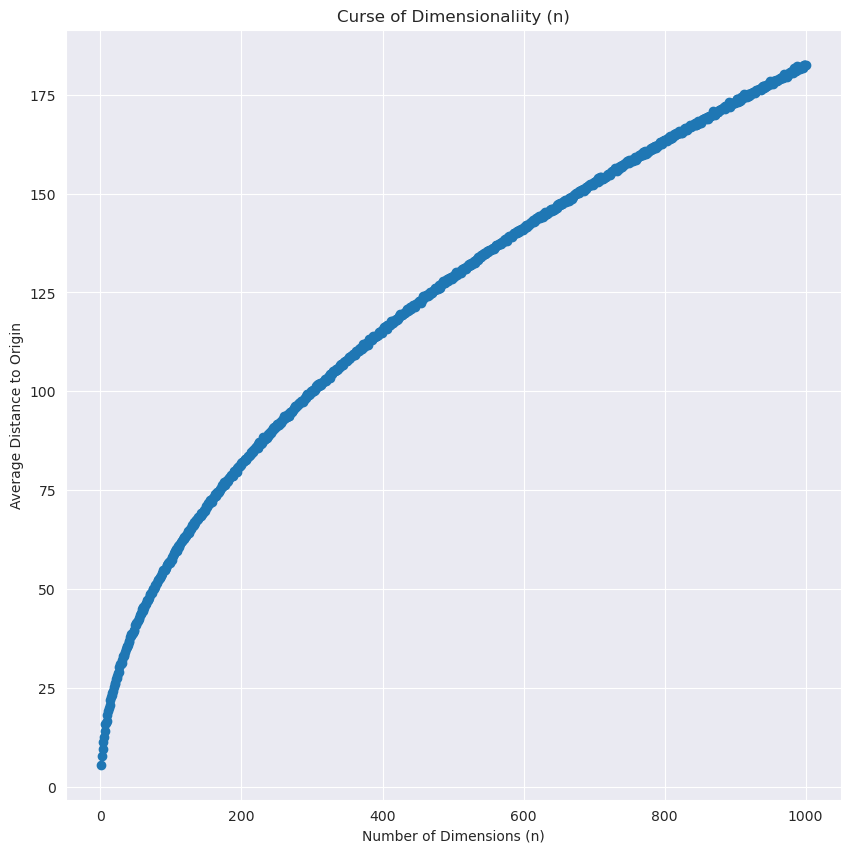

In [4]:
# Your code here
# Create a funtion to cultulate the average diatance to the origin for n-dimensional
def average_distance_to_origin(n, num_points = 100):
    
    # Generate points for n-dimensional space
    points = np.random.uniform(-10, 10, size = (num_points, n))
    
    # Calculate the Euclidean distance between the points
    distances = np.linalg.norm(points, axis = 1)
    
    #Calculate and return the mean distance
    return np.mean(distances)

# Initialize the list to store the results
dimensions = []
average_distances = []

# Iterate through dimensions of 1 to 1000
for n in range(1, 1001):
    avg_distances = average_distance_to_origin(n)
    dimensions.append(n)
    average_distances.append(avg_distances)
    
# Create a plot to visualize the results
plt.figure(figsize = (10, 10))
plt.plot(dimensions, average_distances, marker = 'o', linestyle = '-')
plt.title('Curse of Dimensionaliity (n)')
plt.xlabel('Number of Dimensions (n)')
plt.ylabel('Average Distance to Origin')
plt.grid(True)
plt.show();

    

## Convergence Time

As mentioned before, another issue with increasing the dimension of the feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then, sum these feature-coefficient products to get an output, `y`. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [5]:
import pandas as pd
import datetime
import time
from sklearn.linear_model import LinearRegression, Lasso

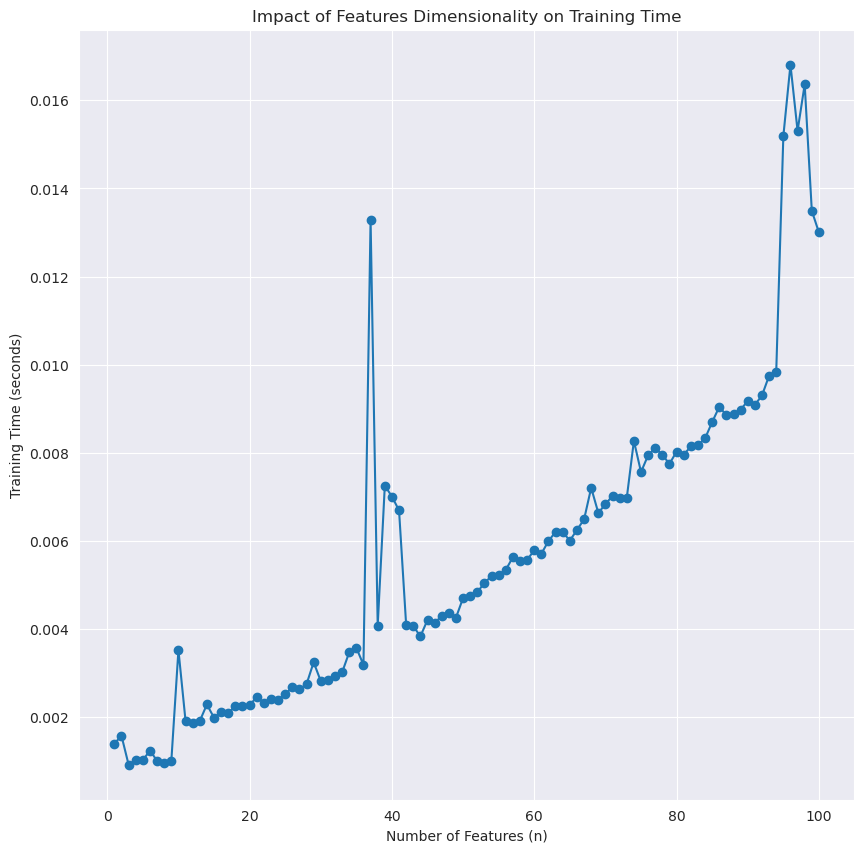

In [6]:
# ⏰ Your code may take some time to run 
# A function to genarete random data that will be used to measure time for training ML model
def generate_data_and_train(n):
    
    # Genareate the features for the data
    X = np.random.rand(1000, n)
    
    # Choose an arbitrary coefficient and creeate y
    coef = np.random.rand(n)
    y    = np.dot(X, coef)
    
    # Add normally distribution white noise parameter
    noise = np.random.normal(0, 0.1, size = 1000)
    y += noise
    
    # Create and train a linear regression model
    model = LinearRegression()
    start_time = time.time()
    
    # Fit the model
    model.fit(X, y)
    end_time = time.time()
    
    # Calculate the time taken t train the model
    return end_time - start_time

# Initialize the list to store the results
dimensions = []
training_times = []

# Vary the time of training
for n in range(1, 101):
    training_time = generate_data_and_train(n)
    dimensions.append(n)
    training_times.append(training_time)
    
# Create a plot to visualize the results
plt.figure(figsize = (10, 10))
plt.plot(dimensions, training_times, marker = 'o', linestyle = '-')
plt.title('Impact of Features Dimensionality on Training Time')
plt.xlabel('Number of Features (n)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show();
    
    

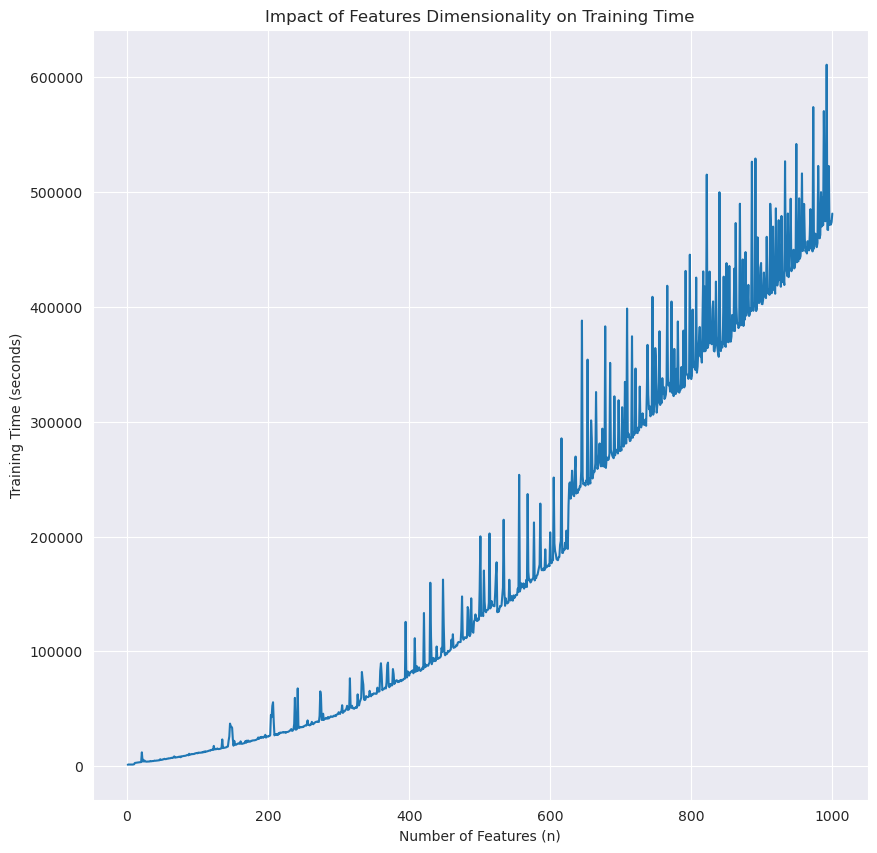

In [7]:
# Alternativelly:

# Initialize a linearRegression model from the scikit learn
model = LinearRegression()

# Create an empty list to store training time 
times = []

# Set the sample size to 1000
sample_size = 10**3

# Create a for loop
for n in range(1, 1001):
    # Generate random features for X ranging from -10 to 10
    X = [np.random.uniform(low = -10, high = 10, size = n) for i in range(sample_size)]
    
    # Create coeffeicient arrays from range 1 to 'n'
    coef = np.array(range(1, n+1))
    
    # Create and calculate for y as a dot product of X and coefficient array and add random normal noise
    y = np.sum(coef*X, axis = 1) + np.random.normal(loc = 0, scale = .1, size = sample_size)
    
    # Create a new LinearRegression Model 
    model = LinearRegression()
    
    # Record the starting time
    start_time = datetime.datetime.now()
    
    # Fit the LimearRegression model
    model.fit(X, y)
    
    # Record the ending time
    end_time = datetime.datetime.now()
    
    # Calculate the elapse time/training time
    elapse_time = end_time - start_time
    
    # Append the elapse_time to time
    times.append(elapse_time)
    
# Plot the range values 'n' vs training time in microseconds
plt.figure(figsize = (10, 10))
plt.plot(range(1, 1001), [t.microseconds for t in times])
plt.title('Impact of Features Dimensionality on Training Time')
plt.xlabel('Number of Features (n)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show();

- Repeat the same experiment for a Lasso penalized regression model

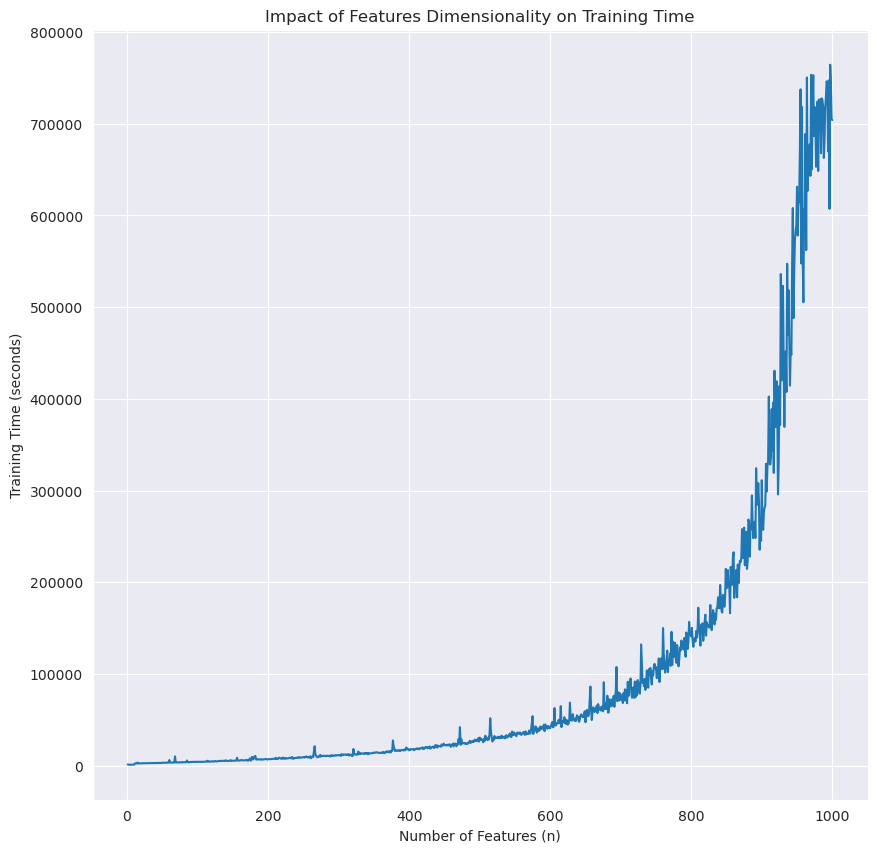

In [8]:
# ⏰ Your code may take some time to run 
sample_size = 10**3
times = []

for n in range(1, 1001):
    X = [np.random.uniform(low = -10, high = 10, size = n) for i in range(sample_size)]
    coef = np.array(range(1, n+1))
    y = np.sum(coef*X, axis = 1) + np.random.normal(loc = 0, scale = .1, size = sample_size)
    lasso = Lasso()
    start = datetime.datetime.now()
    lasso.fit(X, y)
    end = datetime.datetime.now()
    
    elapse = end - start
    
    times.append(elapse)
    
# Plot 
plt.figure(figsize = (10, 10))
plt.plot(range(1, 1001), [t.microseconds for t in times])
plt.title('Impact of Features Dimensionality on Training Time')
plt.xlabel('Number of Features (n)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show();

## Optional (Level Up)

### Show Just How Slow it Can Go!

If you're up for putting your computer through the wringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

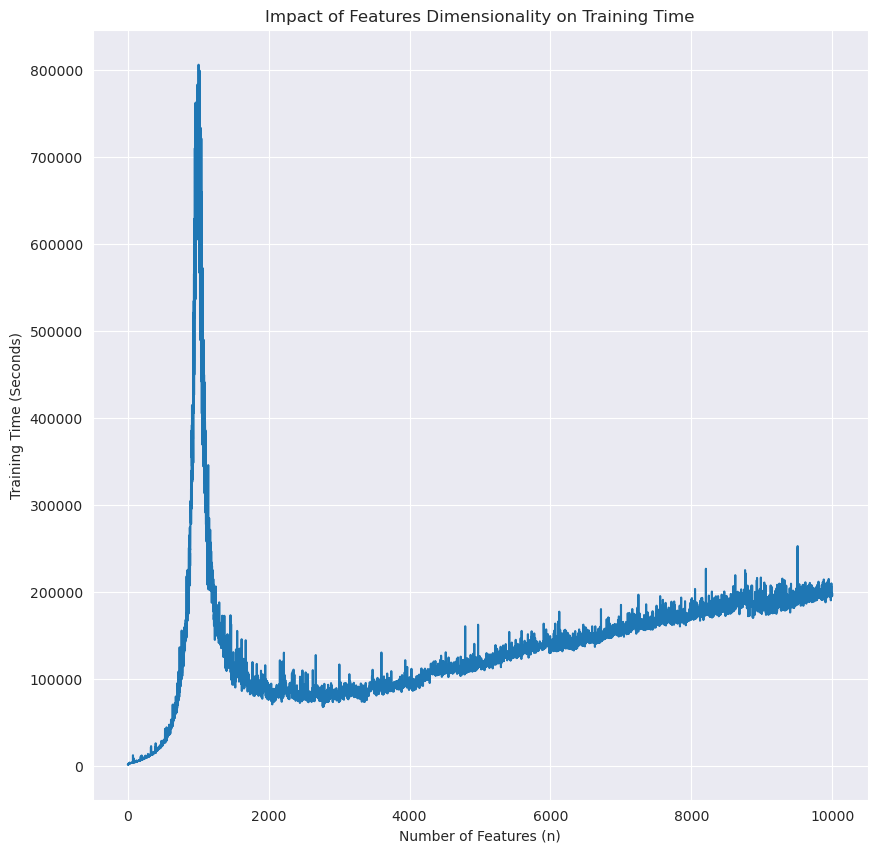

In [9]:
# ⏰ Your code may take some time to run 

sample_size = 10**3
times = []

for n in range(1, 10001):
    X = [np.random.uniform(low = -10, high = 10, size = n) for i in range(sample_size)]
    coef = np.array(range(1, n+1))
    y = np.sum(coef*X, axis = 1) + np.random.normal(loc = 0, scale = .1, size = sample_size)
    
    lasso = Lasso()
    
    start = datetime.datetime.now()
    
    lasso.fit(X, y)
    
    end = datetime.datetime.now()
    
    elapse = end - start
    
    times.append(elapse)
    
# Plot
plt.figure(figsize = (10, 10))
plt.plot(range(1, 10001), [t.microseconds for t in times])
plt.title('Impact of Features Dimensionality on Training Time')
plt.xlabel('Number of Features (n)')
plt.ylabel('Training Time (Seconds)')
plt.grid(True)
plt.show();

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will explore principal component analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.